## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.


Simulacion COVID 19
Llega un paciente nuevo:  0 al hospital Moreno
Llega un paciente nuevo:  1 al hospital Moreno
Llega un paciente nuevo:  2 al hospital Moreno
Llega un paciente nuevo:  3 al hospital Moreno
Llega un paciente nuevo:  4 al hospital Moreno
Llega un paciente nuevo:  5 al hospital Moreno
Llega un paciente nuevo:  6 al hospital Moreno
Llega un paciente nuevo:  7 al hospital Moreno
Llega un paciente nuevo:  8 al hospital Moreno
Llega un paciente nuevo:  9 al hospital Moreno
Llega un paciente nuevo:  10 al hospital Moreno
Llega un paciente nuevo:  11 al hospital Moreno
Llega un paciente nuevo:  12 al hospital Moreno
Llega un paciente nuevo:  13 al hospital Moreno
Llega un paciente nuevo:  14 al hospital Moreno
Llega un paciente nuevo:  15 al hospital Moreno
Llega un paciente nuevo:  16 al hospital Moreno
Llega un paciente nuevo:  17 al hospital Moreno
Llega un paciente nuevo:  18 al hospital Moreno
Llega un paciente nuevo:  19 al hospital Moreno
Llega un paciente nuevo:  20 a

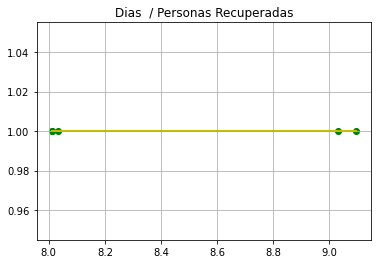

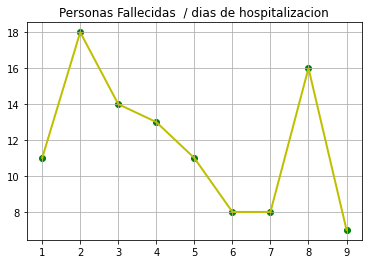

[0.0100602251620149, 0.010452272195123654, 0.010517630437247162, 0.0105485920526798, 0.010637581848747107, 0.010704809730919545, 0.01079807889247841, 0.010809831525433477, 0.010816592668183007, 0.010831233957384893, 0.010314503268326669, 0.010031433618591051, 0.010186818516026175, 0.010457761683728825, 0.010485846749030357, 0.010992137470649518, 0.010615422810239873, 0.010770191436000222, 0.010117309934839024, 0.010748034390864233, 0.010411038631189888, 0.010136683207695504, 0.010755918583013493, 0.010618828775813926, 0.010429720863389901, 0.010148989966600444, 0.010913486134311274, 0.01045531230151749, 0.010868305154963256, 0.010690554856105214, 0.010559532099520898, 0.0108288217723972, 0.01006774168709483, 0.010651483730629645, 0.010257069224243317, 0.01079131758114098, 0.0105606589621561, 0.010599800130255034, 0.010977594435071358, 0.010033217491031681, 0.010283003116624017, 0.010052597437259546, 0.010680968769551706, 0.010194019374400093, 0.010695685684507994, 0.010080995944600381]

In [3]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline


#PARAMETROS
numeroHospitales = 1
numeroCamas= 35
numeroConsultorios = 10
contagiados = 70
crecimiento = 11
tiempoConsulta = 0.0105 #15 minutos 
internado = 10
simulacion = 10


#Diccionario para almacenar los resultados
recuperados={}
muertos={}
tConsultas=[]
TiempoEsperaConsultorio=[]
pacienteMuertosSinAntencionM=[]
pacientesAtendidos=[]



class Hospital(object):
    #constructor
    def __init__(self, env, num_cama,num_consultorios, name):
            self.env = env
            self.num_cama = num_cama
            self.num_consultorios=num_consultorios
            self.camas = simpy.Resource(env, num_cama)
            self.consultorios=simpy.Resource(env, num_consultorios)
            self.name = name
    def ingresarConsultorio(self,paciente):
        consulta=random.uniform(tiempoConsulta-0.0005, tiempoConsulta+0.0005)
        yield self.env.timeout(consulta)
        print("El paciente ", paciente, " espero", int(consulta*1440), "minutos para se atendido")
        tConsultas.append(consulta)
        
    def PacienteCama(self, paciente):
        yield self.env.timeout(random.randint(internado-2, internado+2))
        print("El paciente ", paciente, " fue internado el día ", int(self.env.now))

def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    with hospital.consultorios.request() as consultorio:
        esperandoConsulta=random.randint(1,3)
        TiempoEsperaConsultorio.append(esperandoConsulta)
        reque2 = yield consultorio | env.timeout(esperandoConsulta)
        espera2 = env.now - arrive
        if consultorio in reque2:
            print("Al paciente: ", paciente, " se le asigna una cama")
            yield env.process(hospital.ingresarConsultorio(paciente))
            estado = random.randint(1,100)
            pacientesAtendidos.append(1)
            if(estado < 40):
                with hospital.camas.request() as cama:
                    arrive2 = env.now
                    dias_esperando = random.randint(1,5) 
                    requerimiento = yield cama | env.timeout(dias_esperando) # tiempo de espera
                    espera = env.now - arrive2
                    if cama in requerimiento:
                        print("Al paciente: ", paciente, " se le asigna una cama")
                        yield env.process(hospital.PacienteCama(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
                            muertos[env.now] = muertos[env.now] + 1 if env.now in muertos else  1
                        else:
                            recuperados[env.now] = recuperados[env.now] + 1 if env.now in recuperados else 1
                    else:
                        print("El paciente " , paciente, " espero ", int(espera) , " dias y fallece por la falta de camas")
                        muertos[env.now] = muertos[env.now] + 1 if env.now in muertos else  1
            else :
                print("El paciente ", paciente, " no tiene COVID-19" )
        else:
            print("El paciente " , paciente, "espero ", int(espera2) ," dias y fallece porque no fue atendido")
            pacienteMuertosSinAntencionM.append(1)
            muertos[env.now] = muertos[env.now] + 1 if env.now in muertos else  1
def ejecutar(env, tasacrecimiento, infectados):
    hospitalMoreno = Hospital(env, numeroCamas,numeroConsultorios, "Moreno")
    for i in range(infectados):
        asignar_hospital(env, hospitalMoreno, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasacrecimiento):
            paciente += 1
            asignar_hospital(env, hospitalMoreno, paciente)
                
def asignar_hospital(env, hospitalMoreno, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega un paciente nuevo: ", paciente, "al hospital Moreno")
        env.process(llegada_paciente(env, hospitalMoreno, paciente))

print("Simulacion COVID 19")
env=simpy.Environment()
env.process(ejecutar(env,crecimiento, contagiados))
env.run(until=simulacion)

print("Resultados pacientes :")
print("Recuperados: ")
print(recuperados)
print("Fallecidos: ")
print(muertos)

datos=sorted(recuperados.items())
x, y =zip(*datos) 
pp.plot(x,y,linewidth=2,color='y') 
pp.scatter(x,y,color='g')
pp.title("Dias  / Personas Recuperadas")
pp.grid(True)
pp.show()

if (muertos):
    datos=sorted(muertos.items())
    x, y =zip(*datos)
    pp.plot(x,y,linewidth=2,color='y')
    pp.scatter(x,y,color='g')
    pp.title("Personas Fallecidas  / dias de hospitalizacion")
    pp.grid(True)
    pp.show() 
print(tConsultas)
print(TiempoEsperaConsultorio)

In [14]:
print("Tiempo promedio en la sala de espera")
print((int(sum(tConsultas)/len(tConsultas)*1440)), " minutos")
print("Tiempo promedio para que una persona sea atendida desde su llegada al hospital")
print(int(24*(sum(TiempoEsperaConsultorio)/len(TiempoEsperaConsultorio))), " horas")
print("Numero de pacientes atendidos")
print(sum(pacientesAtendidos))
print("Pacientes sin atencion medica y fallecieron")
print(sum(pacienteMuertosSinAntencionM))

Tiempo promedio en la sala de espera
15  minutos
Tiempo promedio para que una persona sea atendida desde su llegada al hospital
44  horas
Numero de pacientes atendidos
46
Pacientes sin atencion medica y fallecieron
106


**Garay Largo Lucy Marisol**